In [1]:
import pandas as pd
import numpy as np
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(by = ['sqft_living','price'])
print(sales.head(2))

               id             date     price  bedrooms  bathrooms  \
19452  3980300371  20140926T000000  142000.0       0.0       0.00   
15381  2856101479  20140701T000000  276000.0       1.0       0.75   

       sqft_living  sqft_lot  floors  waterfront  view     ...      grade  \
19452        290.0     20875     1.0           0     0     ...          1   
15381        370.0      1801     1.0           0     0     ...          5   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
19452         290              0      1963             0    98024  47.5308   
15381         370              0      1923             0    98117  47.6778   

          long  sqft_living15  sqft_lot15  
19452 -121.888         1620.0     22850.0  
15381 -122.389         1340.0      5000.0  

[2 rows x 21 columns]


## Polynomial regression, revisited

In [2]:
def polynomial_dataframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe = pd.DataFrame(feature)
    poly_sframe.columns = ['power_1']
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature**power
    return poly_sframe
    

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
tmp = np.array([1., 2., 3.])
tmp_cubed = tmp**3
print (tmp)
print (tmp_cubed)


ex_sframe={}
ex_sframe['power_1'] = tmp
print(ex_sframe)

print(polynomial_dataframe(tmp, 3))

[ 1.  2.  3.]
[  1.   8.  27.]
{'power_1': array([ 1.,  2.,  3.])}
   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


## Import Data 

In [5]:
sales = pd.read_csv('kc_house_data.csv')
sales = sales.sort_values(by=['sqft_living','price'])

train = pd.read_csv('wk3_kc_house_train_data.csv')
test = pd.read_csv('wk3_kc_house_test_data.csv')


poly1_data = polynomial_dataframe(sales['sqft_living'], 2)
poly1_data['price'] = sales['price'] # add price to the data since it's the target
print(poly1_data.head(4))

       power_1  power_2     price
19452      290    84100  142000.0
15381      370   136900  276000.0
860        380   144400  245000.0
18379      384   147456  265000.0


Let us revisit the 15th-order polynomial model using the 'sqft_living' input. Generate polynomial features up to degree 15 using polynomial_sframe() and fit a model with these features. When fitting the model, use an L2 penalty of 1e-5:

In [6]:
l2_small_penalty = 1e-5

Note: When we have so many features and so few data points, the solution can become highly numerically unstable, which can sometimes lead to strange unpredictable results. Thus, rather than using no regularization, we will introduce a tiny amount of regularization (l2_penalty=1e-5) to make the solution numerically stable. (In lecture, we discussed the fact that regularization can also help with numerical stability, and here we are seeing a practical example.)

With the L2 penalty specified above, fit the model and print out the learned weights.

Hint: make sure to add 'price' column to the new SFrame before calling graphlab.linear_regression.create(). Also, make sure GraphLab Create doesn't create its own validation set by using the option validation_set=None in this call.

       power_1  power_2   power_3     power_4        power_5          power_6  \
19452      290    84100  24389000  7072810000  2051114900000  594823321000000   

                  power_7              power_8              power_9  \
19452  172498763090000000 -5315590925028654848  8005133933292429824   

                  power_10            power_11             power_12  \
19452 -2800912632598854656 -607924210447579136  8169419707297566720   

                  power_13            power_14             power_15  
19452  7948473681471741952 -785641586888785920 -6475131313233297408  


Text(0,0.5,'Price($)')

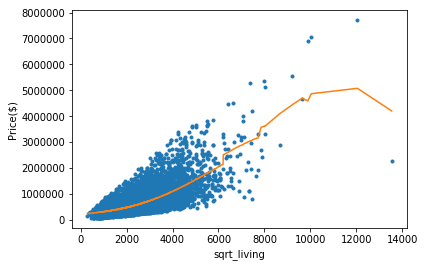

In [7]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
#poly15_data['price'] = sales['price'] # add price to the data since it's the target
print(poly15_data.head(1))
from sklearn import linear_model
import numpy as np

model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, sales['price'])

plt.plot(poly15_data['power_1'],sales['price'],'.',
         poly15_data['power_1'], model.predict(poly15_data),'-')
plt.xlabel('sqrt_living')
plt.ylabel('Price($)')



In [8]:
# The coefficients
import pprint
print('Coefficients: \n')
pprint.pprint(model.coef_)

print('Intercept: \n')
pprint.pprint(model.intercept_)


Coefficients: 

array([  7.07831566e+01,   1.34955940e-02,   8.70171319e-06,
        -6.29807619e-10,  -1.94397167e-14,  -1.57503941e-16,
        -4.60442496e-16,   3.42210621e-16,  -1.99220795e-16,
        -2.50386527e-16,   2.17708004e-16,   6.75752008e-16,
         4.48091745e-16,  -4.08213724e-16,   6.69562960e-17])
Intercept: 

227318.12890757091


## Observe overfitting

Recall from Week 3 that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a high variance. We will see in a moment that ridge regression reduces such variance. But first, we must reproduce the experiment we did in Week 3.

First, split the data into split the sales data into four subsets of roughly equal size and call them set_1, set_2, set_3, and set_4. Use .random_split function and make sure you set seed=0.

In [10]:
from sklearn.model_selection  import train_test_split
l2_small_penalty=1e-9
semi_split1, semi_split2 = train_test_split(sales, test_size =0.5, random_state=0)
set_1, set_2 =  train_test_split(semi_split1, test_size =0.5, random_state=0)
set_3, set_4 =  train_test_split(semi_split2, test_size =0.5, random_state=0)



Next, fit a 15th degree polynomial on set_1, set_2, set_3, and set_4, using 'sqft_living' to predict prices. Print the weights and make a plot of the resulting model.

Hint: When calling graphlab.linear_regression.create(), use the same L2 penalty as before (i.e. l2_small_penalty). Also, make sure GraphLab Create doesn't create its own validation set by using the option validation_set = None in this call.

Coefficients _ set 1: 
 [ -5.40310487e+01   5.84264615e-02   4.52746059e-06  -6.32926798e-10
  -2.07600738e-14  -4.54960461e-17  -1.03501532e-15   1.04686213e-15
   8.52498888e-17  -1.02824532e-15   1.29220190e-16  -5.59499281e-16
   1.26027174e-16  -4.16785110e-16   8.84451076e-16]
Intercept: 
 318942.854362


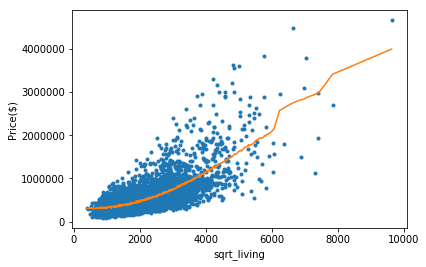

In [11]:
set_1 = set_1.sort_values(by=['sqft_living','price'])
set_2 = set_2.sort_values(by=['sqft_living','price'])
set_3 = set_3.sort_values(by=['sqft_living','price'])
set_4 = set_4.sort_values(by=['sqft_living','price'])

poly15_set1 = polynomial_dataframe(set_1['sqft_living'], 15)
poly15_set2 = polynomial_dataframe(set_2['sqft_living'], 15)
poly15_set3 = polynomial_dataframe(set_3['sqft_living'], 15)
poly15_set4 = polynomial_dataframe(set_4['sqft_living'], 15)

model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_set1, set_1['price'])

plt.plot(poly15_set1['power_1'],set_1['price'],'.',
         poly15_set1['power_1'], model.predict(poly15_set1),'-')
plt.xlabel('sqrt_living')
plt.ylabel('Price($)')
# The coefficients
print('Coefficients _ set 1: \n', model.coef_)
print('Intercept: \n', model.intercept_)


Coefficients_set 2: 
 [ -3.67136292e+01   7.15075512e-02  -3.31336039e-06   8.91876010e-11
  -7.96223758e-15   1.82397425e-16  -5.20722702e-16   1.12795475e-16
  -2.90477612e-16   4.61192146e-16  -6.84647275e-16   7.71896573e-16
   6.70900915e-16   2.29278905e-16  -3.26373038e-16]
Intercept: 
 292903.261061


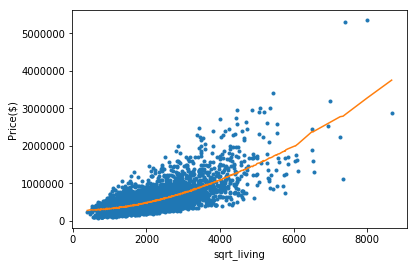

In [34]:
model.fit(poly15_set2, set_2['price'])
plt.plot(poly15_set2['power_1'],set_2['price'],'.',
         poly15_set2['power_1'], model.predict(poly15_set2),'-')
plt.xlabel('sqrt_living')
plt.ylabel('Price($)')
# The coefficients
print('Coefficients_set 2: \n', model.coef_)
print('Intercept: \n', model.intercept_)



Coefficients_set 3: 
 [  2.29722813e+02  -5.19045050e-02   1.90671443e-05  -1.11743531e-09
  -4.42332173e-14  -4.18745237e-16   1.90518292e-16   8.60422094e-17
  -6.47060541e-16   4.34394522e-16   9.92463172e-16   1.54125728e-15
   3.02261779e-16  -6.34714770e-16  -7.71612028e-16]
Intercept: 
 110420.361885


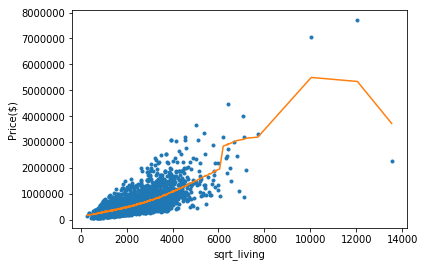

In [12]:

model.fit(poly15_set3, set_3['price'])
plt.plot(poly15_set3['power_1'],set_3['price'],'.',
         poly15_set3['power_1'], model.predict(poly15_set3),'-')
plt.xlabel('sqrt_living')
plt.ylabel('Price($)')
# The coefficients
print('Coefficients_set 3: \n', model.coef_)
print('Intercept: \n', model.intercept_)


Coefficients _ set 4: 
 [ -2.92250519e+02   2.08551796e-01  -3.23959455e-05   2.09038942e-09
   1.47607884e-14  -2.48460347e-16  -4.86888370e-16   1.21781876e-16
   1.70098258e-16  -8.93587196e-16   3.39231873e-16   1.09678944e-15
   1.12510288e-15  -6.17884080e-16   3.79743514e-16]
Intercept: 
 447338.739787


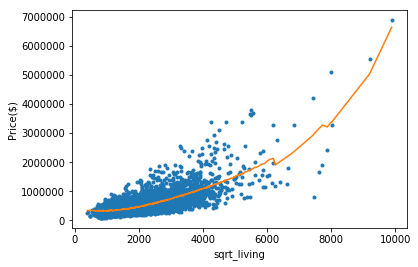

In [13]:
model.fit(poly15_set4, set_4['price'])
plt.plot(poly15_set4['power_1'],set_4['price'],'.',
         poly15_set4['power_1'], model.predict(poly15_set4),'-')
plt.xlabel('sqrt_living')
plt.ylabel('Price($)')

# The coefficients
print('Coefficients _ set 4: \n', model.coef_)
print('Intercept: \n', model.intercept_)

## Ridge regression comes to rescue

Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (Weights of model15 looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.)

With the argument l2_penalty=1e5, fit a 15th-order polynomial model on set_1, set_2, set_3, and set_4. Other than the change in the l2_penalty parameter, the code should be the same as the experiment above. Also, make sure GraphLab Create doesn't create its own validation set by using the option validation_set = None in this call.

Coefficients _ set 1: 
 [  2.24741966e+00   4.17321864e-04   6.89750914e-08   8.62805823e-12
   2.07017537e-15  -1.86735851e-17   2.68387065e-19  -5.62384001e-18
  -3.16491147e-19  -1.31147957e-17   6.69628470e-18  -6.41384844e-18
  -7.94497892e-18  -7.30223749e-18  -1.66488319e-17]
Intercept: 
 531334.670017


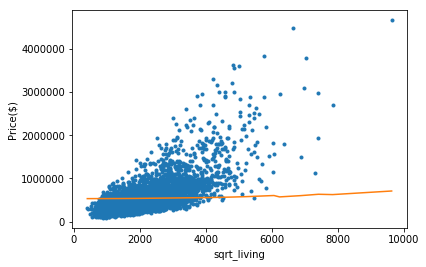

In [16]:
l2_large_penalty=1.23e2

model = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model.fit(poly15_set1, set_1['price'])

plt.plot(poly15_set1['power_1'],set_1['price'],'.',
         poly15_set1['power_1'], model.predict(poly15_set1),'-')
plt.xlabel('sqrt_living')
plt.ylabel('Price($)')
# The coefficients
print('Coefficients _ set 1: \n', model.coef_)
print('Intercept: \n', model.intercept_)


Coefficients_set 2: 
 [  2.11154544e+00   3.93210170e-04   6.77823596e-08   9.51768093e-12
   1.99377300e-15  -2.90172378e-17   1.38219195e-17  -1.37050481e-17
  -8.74417558e-18  -1.17171783e-17   3.80550726e-18   2.45534956e-18
  -4.10796306e-18  -1.23072295e-17  -3.19664965e-17]
Intercept: 
 529905.094374
Coefficients_set 3: 
 [  2.30318610e+00   3.58990631e-04   3.29524944e-08   1.97771813e-12
   9.85841003e-16  -2.31326039e-17   1.15017746e-17  -1.85357726e-18
  -2.39436380e-17   2.83344756e-18   2.15075092e-17  -3.51407881e-18
  -5.82424690e-18  -2.08305731e-17  -3.31745015e-17]
Intercept: 
 537941.542343
Coefficients _ set 4: 
 [  2.21187785e+00   4.03002668e-04   6.21419428e-08   7.36409838e-12
   1.69827612e-15  -2.87558886e-17   1.40938149e-17  -1.75007212e-18
   1.06555230e-20  -1.55093348e-17   2.43828181e-18   1.03851624e-18
   1.28789737e-20  -2.47796390e-17  -1.43663440e-17]
Intercept: 
 528596.048937


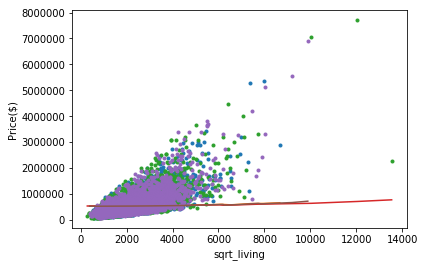

In [17]:
model.fit(poly15_set2, set_2['price'])
plt.plot(poly15_set2['power_1'],set_2['price'],'.',
         poly15_set2['power_1'], model.predict(poly15_set2),'-')
plt.xlabel('sqrt_living')
plt.ylabel('Price($)')
# The coefficients
print('Coefficients_set 2: \n', model.coef_)
print('Intercept: \n', model.intercept_)


model.fit(poly15_set3, set_3['price'])
plt.plot(poly15_set3['power_1'],set_3['price'],'.',
         poly15_set3['power_1'], model.predict(poly15_set3),'-')
plt.xlabel('sqrt_living')
plt.ylabel('Price($)')
# The coefficients
print('Coefficients_set 3: \n', model.coef_)
print('Intercept: \n', model.intercept_)

model.fit(poly15_set4, set_4['price'])
plt.plot(poly15_set4['power_1'],set_4['price'],'.',
         poly15_set4['power_1'], model.predict(poly15_set4),'-')
plt.xlabel('sqrt_living')
plt.ylabel('Price($)')

# The coefficients
print('Coefficients _ set 4: \n', model.coef_)
print('Intercept: \n', model.intercept_)

These curves should vary a lot less, now that you applied a high degree of regularization.

QUIZ QUESTION: For the models learned with the high level of regularization in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature power_1? (For the purpose of answering this question, negative numbers are considered "smaller" than positive numbers. So -5 is smaller than -3, and -3 is smaller than 5 and so forth.)

## Selecting an L2 penalty via cross-validation

Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. Cross-validation seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called k-fold cross-validation. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
...
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that all observations are used for both training and validation, as we iterate over segments of data.

To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. GraphLab Create has a utility function for shuffling a given SFrame. We reserve 10% of the data as the test set and shuffle the remainder. (Make sure to use seed=1 to get consistent answer.)

In [18]:
#(train_valid, test) = sales.random_split(.9, seed=1)
#train_valid_shuffled = graphlab.toolkits.cross_validation.shuffle(train_valid, random_seed=1)

train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

Once the data is shuffled, we divide it into equal segments. Each segment should receive n/k elements, where n is the number of observations in the training set and k is the number of segments. Since the segment 0 starts at index 0 and contains n/k elements, it ends at index (n/k)-1. The segment 1 starts where the segment 0 left off, at index (n/k). With n/k elements, the segment 1 ends at index (n*2/k)-1. Continuing in this fashion, we deduce that the segment i starts at index (n*i/k) and ends at (n*(i+1)/k)-1.

With this pattern in mind, we write a short loop that prints the starting and ending indices of each segment, just to make sure you are getting the splits right.

In [23]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation
print(n)
for i in range(k):
    start = int((n*i)/k)
    end = int((n*(i+1))/k-1)
    print (i, (start, end))

19396
0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


To verify that we have the right elements extracted, run the following cell, which computes the average price of the fourth segment. When rounded to nearest whole number, the average should be $536,234.

In [21]:
validation4 = train_valid_shuffled[5818: 7757+1]

In [22]:
print (int(round(validation4['price'].mean(), 0)))

536234


Let us familiarize ourselves with array slicing with SFrame. To extract a continuous slice from an SFrame, use colon in square brackets. For instance, the following cell extracts rows 0 to 9 of train_valid_shuffled. Notice that the first index (0) is included in the slice but the last index (10) is omitted.

Let us familiarize ourselves with array slicing with Pandas. To extract a continuous slice from a DataFrame, use colon in square brackets. For instance, the following cell extracts rows 0 to 9 of train_valid_shuffled. Notice that the first index (0) is included in the slice but the last index (10) is omitted.

In [20]:
train_valid_shuffled[0:10] # rows 0 to 9

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2780400035,20140505T000000,665000.0,4.0,2.50,2800.0,5900,1.0,0,0,...,8,1660,1140,1963,0,98115,47.6809,-122.286,2580.0,5900.0
1,1703050500,20150321T000000,645000.0,3.0,2.50,2490.0,5978,2.0,0,0,...,9,2490,0,2003,0,98074,47.6298,-122.022,2710.0,6629.0
2,5700002325,20140605T000000,640000.0,3.0,1.75,2340.0,4206,1.0,0,0,...,7,1170,1170,1917,0,98144,47.5759,-122.288,1360.0,4725.0
3,0475000510,20141118T000000,594000.0,3.0,1.00,1320.0,5000,1.0,0,0,...,7,1090,230,1920,0,98107,47.6674,-122.365,1700.0,5000.0
4,0844001052,20150128T000000,365000.0,4.0,2.50,1904.0,8200,2.0,0,0,...,7,1904,0,1999,0,98010,47.3107,-122.001,1560.0,12426.0
5,2781280290,20150427T000000,305000.0,3.0,2.50,1610.0,3516,2.0,0,0,...,8,1610,0,2006,0,98055,47.4491,-122.188,1610.0,3056.0
6,2214800630,20141105T000000,239950.0,3.0,2.25,1560.0,8280,2.0,0,0,...,7,1560,0,1979,0,98001,47.3393,-122.259,1920.0,8120.0
7,2114700540,20141021T000000,366000.0,3.0,2.50,1320.0,4320,1.0,0,0,...,6,660,660,1918,0,98106,47.5327,-122.347,1190.0,4200.0
8,2596400050,20140730T000000,375000.0,3.0,1.00,1960.0,7955,1.0,0,0,...,7,1260,700,1963,0,98177,47.7641,-122.364,1850.0,8219.0
9,4140900050,20150126T000000,440000.0,4.0,1.75,2180.0,10200,1.0,0,2,...,8,2000,180,1966,0,98028,47.7638,-122.270,2590.0,10445.0


Now let us extract individual segments with array slicing. Consider the scenario where we group the houses in the train_valid_shuffled dataframe into k=10 segments of roughly equal size, with starting and ending indices computed as above. Extract the fourth segment (segment 3) and assign it to a variable called validation4.

Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) k, (ii) l2_penalty, (iii) dataframe containing input features (e.g. poly15_data) and (iv) column of output values (e.g. price). The function returns the average validation error using k segments as validation sets. We shall assume that the input dataframe does not contain the output column.

For each i in [0, 1, ... k-1]:

Compute starting and ending indices of segment i and call 'start' and 'end'

Form validation set by taking a slice (start:end+1) from the data.

Form training set by appending slice (end+1:n) to the end of slice (0:start).

Train a linear model using training set just formed, with a given l2_penalty

Compute validation error (RSS) using validation set just formed

In [73]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    
    n = len(data)
    RSS =np.zeros(shape=(k,1))
    for i in range(k):
        start = int((n*i)/k)
        end = int((n*(i+1))/k-1)
        traing_k_x = data[start:end+1]
        traing_k_y = output[start:end+1]
        validation_x = data[0:start].append(data[end:n+1])
        validation_y = output[0:start].append(output[end:n+1])
        
        #poly15_feature = polynomial_dataframe(traing_k_x, 15)
        model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
    
        model.fit(traing_k_x, traing_k_y)
        
        predictions = model.predict(validation_x)
        RSS_temp = ((predictions-validation_y)**2).sum()
        
        RSS[i]=RSS_temp
        
    return RSS.mean()

In [102]:
l2_penalties = np.logspace(3, 9, num=13) 
pprint.pprint(l2_penalties)


print(a.mean())

k=10    

array([  1.00000000e+03,   3.16227766e+03,   1.00000000e+04,
         3.16227766e+04,   1.00000000e+05,   3.16227766e+05,
         1.00000000e+06,   3.16227766e+06,   1.00000000e+07,
         3.16227766e+07,   1.00000000e+08,   3.16227766e+08,
         1.00000000e+09])
0.0


In [103]:
RSS_cross =np.zeros(shape=(len(l2_penalties),1))
output = train_valid_shuffled['price']
i =0
data =polynomial_dataframe(train_valid_shuffled['sqft_living'], 15)
for l2_penalty in l2_penalties:
    RSS_cross[i]= k_fold_cross_validation(k, l2_penalty, data, output)
    i+=1



In [104]:
print(RSS_cross.min())
print(RSS_cross.argmin())
   
index = np.array((l2_penalties))
RSS_print = pd.DataFrame(index)
RSS_print.columns = ['l2_penalty']
RSS_print['RSS'] = RSS_cross
print(RSS_print)

2.38907659432e+15
2
      l2_penalty           RSS
0   1.000000e+03  2.672745e+15
1   3.162278e+03  2.401694e+15
2   1.000000e+04  2.389077e+15
3   3.162278e+04  2.392669e+15
4   1.000000e+05  2.394572e+15
5   3.162278e+05  2.395251e+15
6   1.000000e+06  2.395473e+15
7   3.162278e+06  2.395544e+15
8   1.000000e+07  2.395567e+15
9   3.162278e+07  2.395574e+15
10  1.000000e+08  2.395576e+15
11  3.162278e+08  2.395577e+15
12  1.000000e+09  2.395577e+15


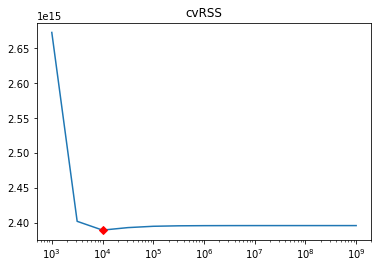

In [105]:

plt.figure()
plt.plot(RSS_print['l2_penalty'], RSS_print['RSS'],'-',
    RSS_print['l2_penalty'][RSS_print['RSS'].argmin()], RSS_print['RSS'].min(),'rD')
plt.title("cvRSS")
plt.xscale('log')
# axes = plt.gca()
#axes.set_xlim([xmin,xmax])
# axes.set_ylim([0,RSS['Validation'][10] * 1.5])
plt.show()

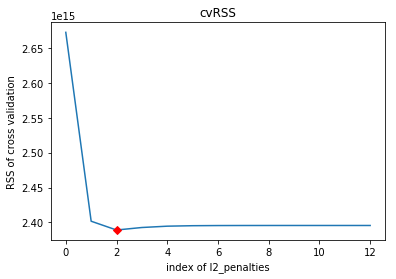

In [106]:
plt.figure()
plt.plot(range(len(l2_penalties)), RSS_cross,'-',
        RSS_cross.argmin(), RSS_cross.min(),'rD')
plt.title("cvRSS")
#plt.yscale('log')
plt.xlabel('index of l2_penalties')
plt.ylabel('RSS of cross validation')
# axes = plt.gca()
#axes.set_xlim([xmin,xmax])
# axes.set_ylim([0,RSS['Validation'][10] * 1.5])
plt.show()


## QUIZ QUESTIONS: What is the best value for the L2 penalty according to 10-fold validation?

You may find it useful to plot the k-fold cross-validation errors you have obtained to better understand the behavior of the method.

## QUIZ QUESTION: Using the best L2 penalty found above, train a model using all training data. What is the RSS on the TEST data of the model you learn with this L2 penalty?

In [86]:
train = pd.read_csv('wk3_kc_house_train_data.csv')
test = pd.read_csv('wk3_kc_house_test_data.csv')

In [107]:
test_feature =polynomial_dataframe(train['sqft_living'], 15)
model = linear_model.Ridge(alpha=l2_penalty[print(RSS_cross.argmin())], normalize=True)

model.fit(test_feature, train['price'])

test_predictions = model.predict(polynomial_dataframe(test['sqft_living'], 15))

test_RSS = ((test_predictions - test['price'])**2).sum()

print(test_RSS)



2
284718924192003.3


Coefficients_set 2: 
 [  2.88598463e-07   5.24926505e-11   7.61368675e-15   7.18476938e-19
   2.25729147e-22  -3.20892281e-24   1.82640468e-24  -1.65975621e-24
  -1.77185767e-24  -1.03977828e-24   9.39721609e-25  -8.42093681e-25
   2.18488435e-25  -1.86244991e-24  -3.23550924e-24]
Intercept: 
 542734.950576


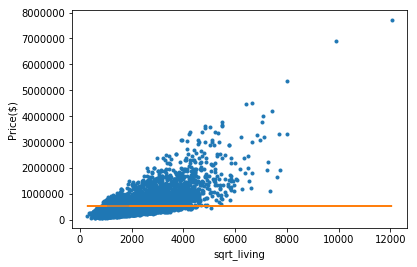

In [108]:
plt.plot(test_feature['power_1'],train['price'],'.',
         test_feature['power_1'], model.predict(test_feature),'-')
plt.xlabel('sqrt_living')
plt.ylabel('Price($)')
# The coefficients
print('Coefficients_set 2: \n', model.coef_)
print('Intercept: \n', model.intercept_)